In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('../Dataset/netflix_titles.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df['date_added'] = df['date_added'].str.strip()

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')

In [17]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [19]:
df['year_added'] = df['date_added'].dt.year

In [20]:
df=df.dropna(subset=['year_added'])
df['year_added']=df['year_added'].astype(int)


In [21]:
df[['title','date_added','year_added']].head(10)

,title,date_added,year_added
0,Dick Johnson Is Dead,2021-09-25,2021
1,Blood & Water,2021-09-24,2021
2,Ganglands,2021-09-24,2021
3,Jailbirds New Orleans,2021-09-24,2021
4,Kota Factory,2021-09-24,2021
5,Midnight Mass,2021-09-24,2021
6,My Little Pony: A New Generation,2021-09-24,2021
7,Sankofa,2021-09-24,2021
8,The Great British Baking Show,2021-09-24,2021
9,The Starling,2021-09-24,2021


In [22]:
yearly_trend=df.groupby('year_added')['show_id'].count().reset_index()
yearly_trend.rename(columns={"show_id":"Count"},inplace=True)

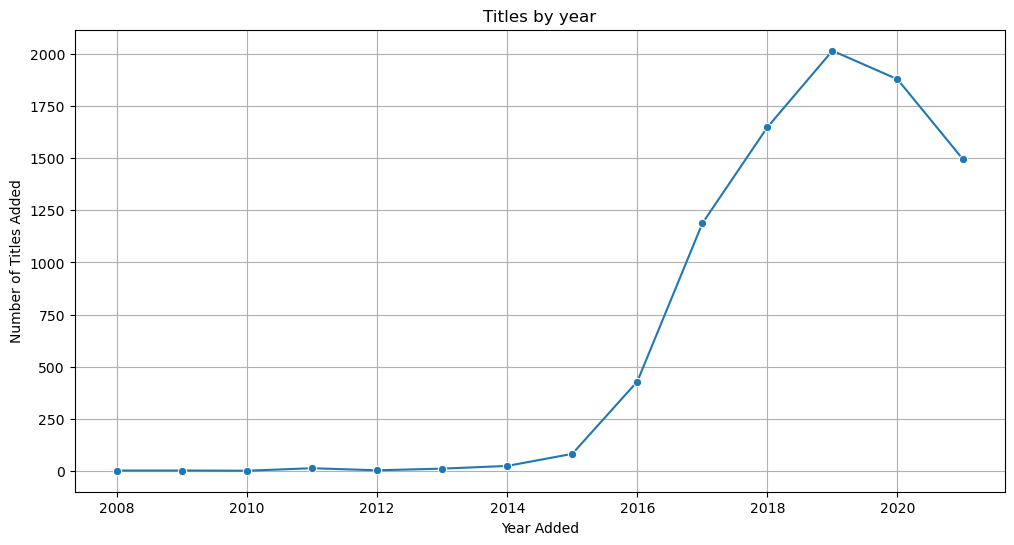

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend,x='year_added',y='Count',marker='o')
plt.title("Titles by year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.savefig("TitlesbyYear.png")


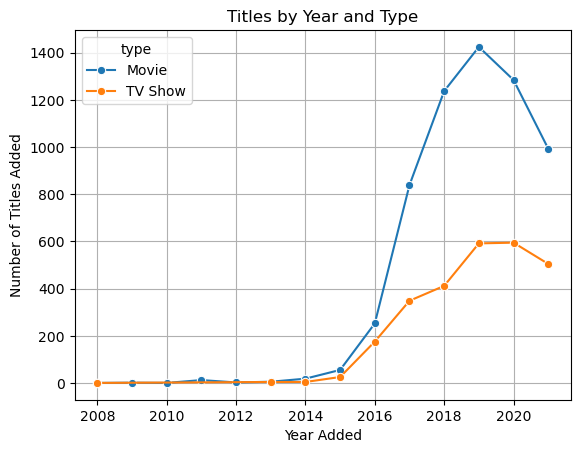

In [37]:
type_trend=df.groupby(['year_added','type'])['show_id'].count().reset_index()
sns.lineplot(data=type_trend,x='year_added',y='show_id',hue='type',marker='o')
plt.title("Titles by Year and Type")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.savefig('titles_by_year_and_type.png')

In [26]:
df=df.dropna(subset=['listed_in'])
df_genre=df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
df_genre['listed_in']=df_genre['listed_in'].str.strip()

In [32]:
genre_trend = (
    df_genre.groupby(['year_added','listed_in'])
    .size()
    .reset_index(name='count')
)

In [34]:
top_genres = (
    df_genre['listed_in']
    .value_counts()
    .head(10)
    .index)

genre_trend=genre_trend[genre_trend['listed_in'].isin(top_genres)]


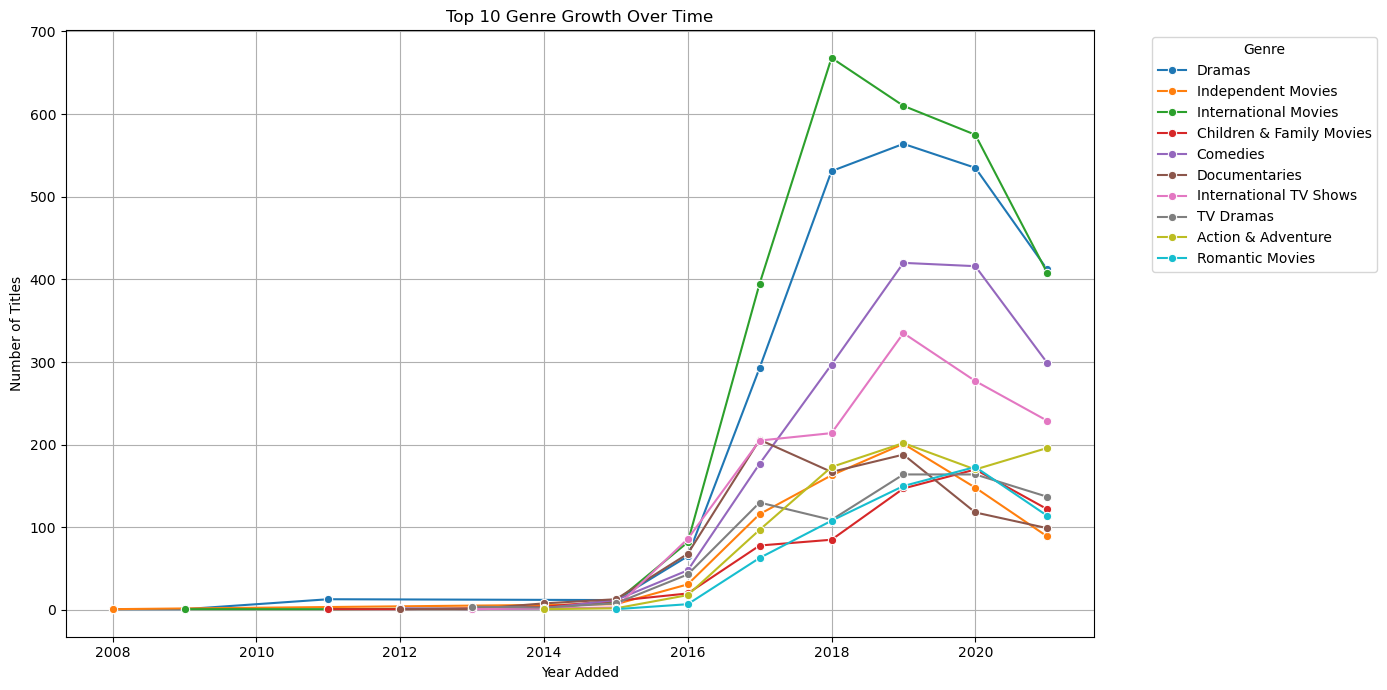

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(
    data=genre_trend,
    x='year_added',
    y='count',
    hue='listed_in',
    marker='o'
)
plt.title('Top 10 Genre Growth Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('top_10_genre_growth.png')


In [39]:
df['month_added']=df['date_added'].dt.month_name()

In [41]:
df['month_added'].value_counts().head()

month_added
July         827
December     813
September    770
April        764
October      760
Name: count, dtype: int64

In [45]:
monthly_counts =(
    df.groupby('month_added')['show_id']
    .count()
    .reset_index(name='Mcount')
)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_counts['month_added'] = pd.Categorical(monthly_counts['month_added'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values('month_added')


/tmp/ipykernel_6228/2120267720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_counts, x='month_added', y='Mcount', palette='coolwarm')


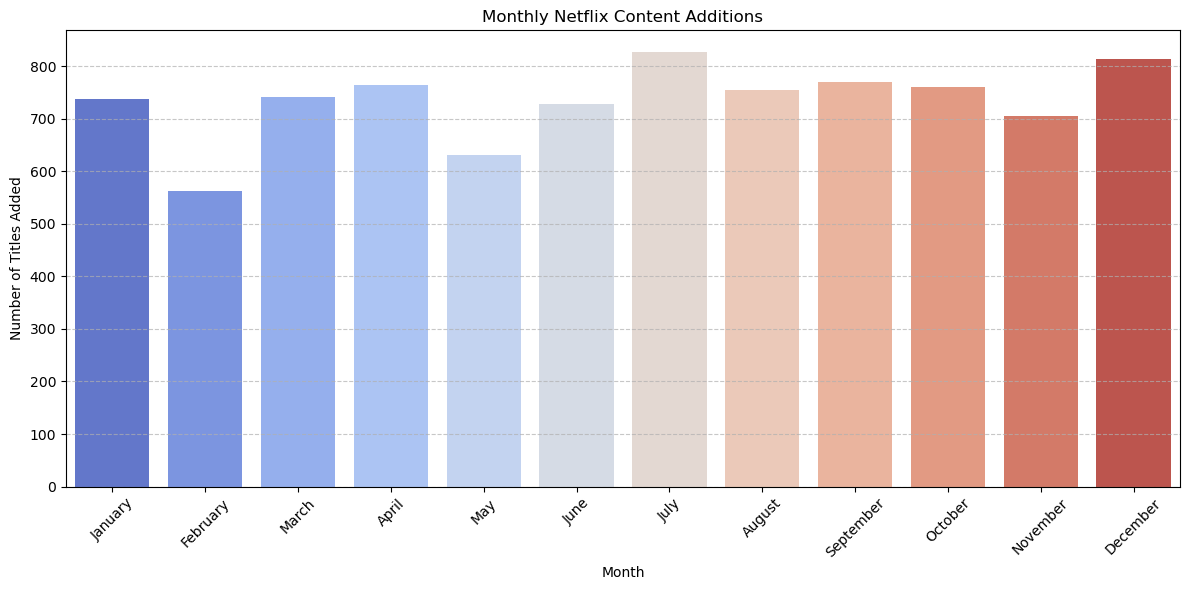

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_counts, x='month_added', y='Mcount', palette='coolwarm')
plt.title('Monthly Netflix Content Additions')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('monthly_netflix_content_additions.png')

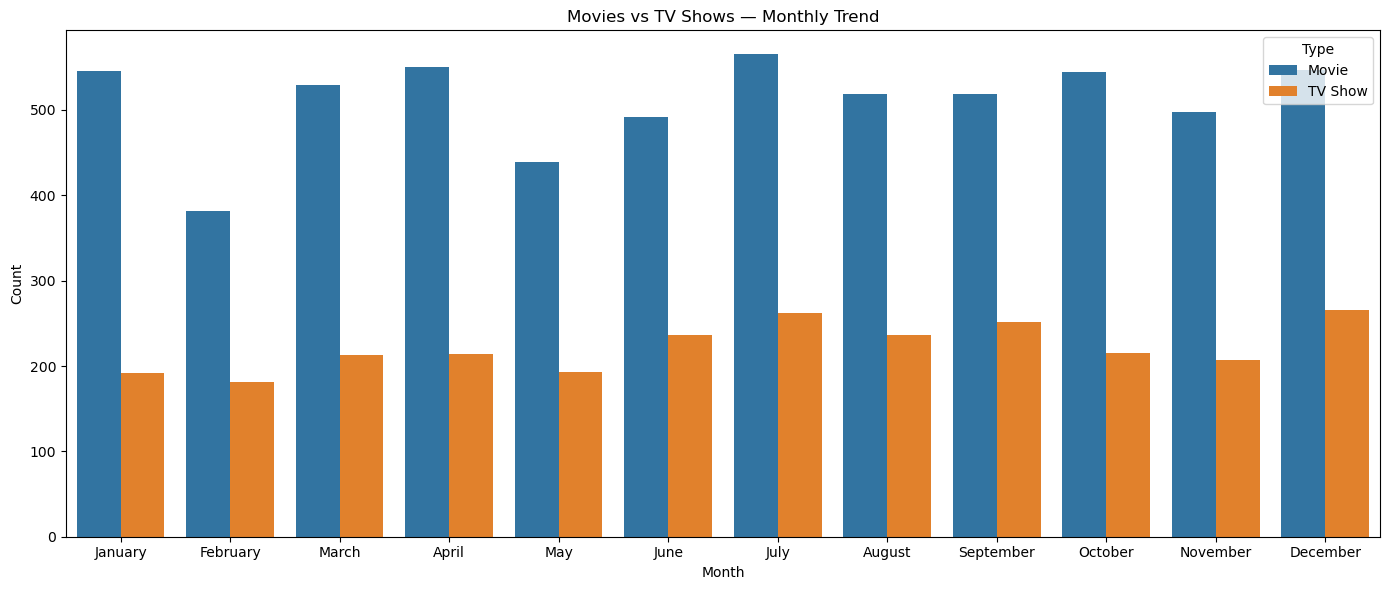

<Figure size 640x480 with 0 Axes>

In [48]:
monthly_type = (
    df.groupby(['month_added', 'type']).size().reset_index(name='count')
)
monthly_type['month_added'] = pd.Categorical(monthly_type['month_added'], categories=month_order, ordered=True)

plt.figure(figsize=(14,6))
sns.barplot(data=monthly_type, x='month_added', y='count', hue='type')
plt.title('Movies vs TV Shows — Monthly Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()
plt.savefig('monthly_movies_vs_tv_shows.png')

/tmp/ipykernel_6228/811820197.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1,1], data=monthly_counts, x='month_added', y='Mcount', palette='coolwarm')


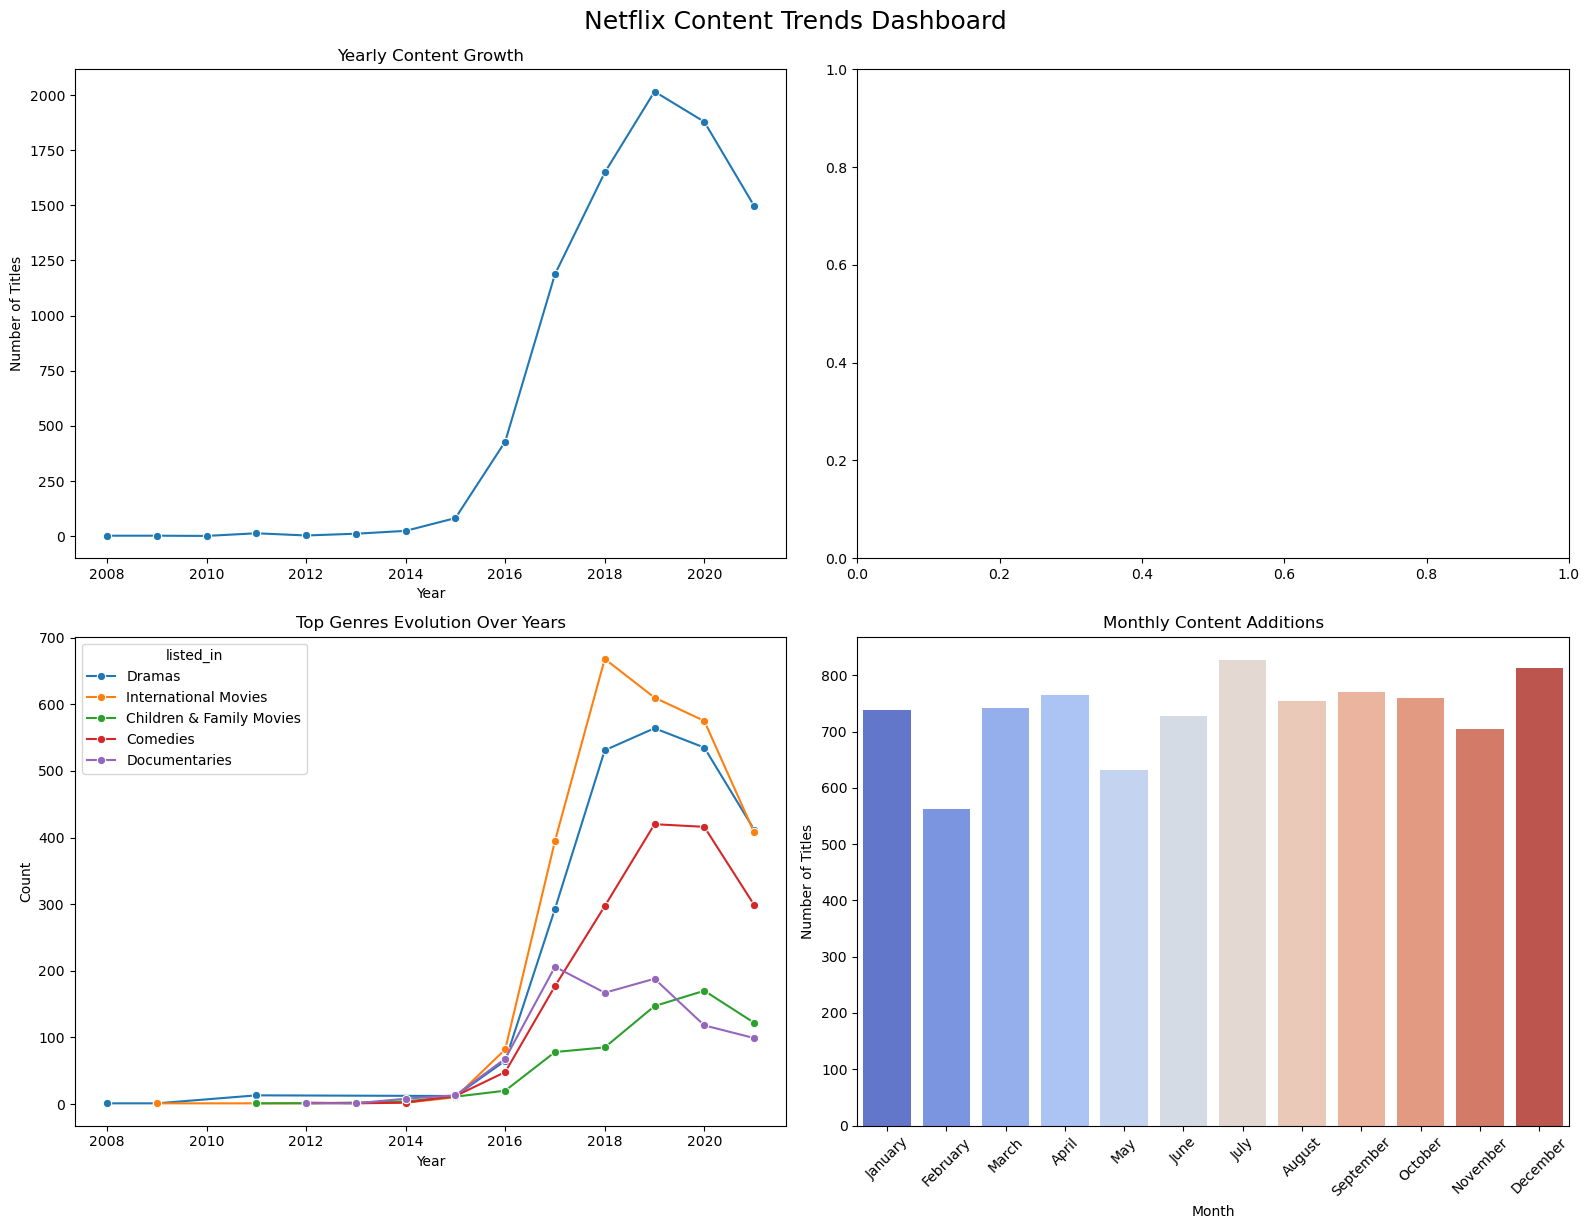

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))  # 2x2 grid
sns.lineplot(ax=axs[0,0], data=yearly_trend, x='year_added', y='Count', marker='o')
axs[0,0].set_title('Yearly Content Growth')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Number of Titles')
top_genres = genre_trend['listed_in'].value_counts().head(5).index
genre_plot_data = genre_trend[genre_trend['listed_in'].isin(top_genres)]

sns.lineplot(ax=axs[1,0], data=genre_plot_data, x='year_added', y='count', hue='listed_in', marker='o')
axs[1,0].set_title('Top Genres Evolution Over Years')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Count')

sns.barplot(ax=axs[1,1], data=monthly_counts, x='month_added', y='Mcount', palette='coolwarm')
axs[1,1].set_title('Monthly Content Additions')
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Number of Titles')
axs[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()   # Adjust spacing between subplots
plt.suptitle('Netflix Content Trends Dashboard', fontsize=18, y=1.02)
plt.savefig('netflix_content_trends_dashboard.png')


                                                END                                                  